In [1]:
import json
import pandas as pd
# import staticmap
# from staticmap import StaticMap, CircleMarker
from transformers import pipeline
from translate import Translator
from copy import copy

In [2]:
f = open("./Data/train_reviews.json")
train_data=json.load(f)
f.close()
f = open("./Data/test_reviews.json")
test_data = json.load(f)
f.close()

'''
Remove duplicates in train
'''
json_data = []
seen_restaurants = []
for i in range(len(train_data)):
    if train_data[i]['title'] not in seen_restaurants:
        json_data += [copy(train_data[i])]
        seen_restaurants.append(train_data[i]['title'])
    else:
        print(train_data[i]['title'], "is duplicated")

'''
Add test restaurants reviews to training restaurants if their name is the same
'''
restaurants_in_training = {}
for i,restaurant in enumerate(json_data):
    restaurants_in_training[restaurant['title']] = i

for restaurant in test_data:
    if restaurant['title'] in restaurants_in_training:
        j = restaurants_in_training[restaurant['title']]
        for r in restaurant['reviews_data']:
            json_data[j]['reviews_data'].append(copy(r))
    else:
        json_data.append(copy(restaurant))

Divan Turkish Restaurant is duplicated
Racó de la Vila is duplicated
La Tagliatella is duplicated
La Tagliatella is duplicated
Buenas Migas is duplicated
Divan Turkish Restaurant is duplicated
Restaurant ASADOR DE ARANDA is duplicated
Restaurant Embat is duplicated
Restaurante Los Hermanos | Comte D'Urgell, Barcelona is duplicated
Restaurant Tíbet is duplicated
Five Guys is duplicated
Restaurante La Tagliatella | Diagonal Mar, Barcelona is duplicated
Five Guys is duplicated
Ten's Tapas Restaurant Barcelona is duplicated
Ramen House is duplicated
Restaurante La Tagliatella | Diagonal Mar, Barcelona is duplicated
Àbac is duplicated
VICIO is duplicated
Bun Bo Barcelona (Gótico) is duplicated
BAR RESTAURANT SET POINT is duplicated
Bun Bo Barcelona (Gótico) is duplicated
Restaurante Jardin is duplicated
Restaurante Vic Braseria en Barcelona, Brasas Catalanas, Especialistas en Carnes y Verduras-Sin Gluten- Barcelona is duplicated
Restaurant Arcasa Cosmocaixa is duplicated
Restaurant Agua is 

In [3]:
dict_names = {}
dict_place_id = {}
for restaurant in json_data:
    if restaurant['title'] not in dict_names:
        dict_names[restaurant['title']] = 1
    else:
        dict_names[restaurant['title']] += 1
    
    if restaurant['place_id'] not in dict_place_id:
        dict_place_id[restaurant['place_id']] = 1
    else:
        dict_place_id[restaurant['place_id']] += 1
            
{k: v for k, v in sorted(dict_place_id.items(), key=lambda item: -item[1])}

{'ChIJTXb6QRdawokRPZZKPYmvWcU': 1,
 'ChIJefD4APiipBIRgyI_ff4Qhxc': 1,
 'ChIJteBarX6ipBIRRYygisKbcPs': 1,
 'ChIJxXT2zueipBIRhT17oqbcnx8': 1,
 'ChIJNa5r9j1awokR7V0YcDbff0o': 1,
 'ChIJxZljK8mjpBIRAUQgty4vUL0': 1,
 'ChIJhRmZ7f2ipBIRs5_ZKx_mJV0': 1,
 'ChIJa-LjmfaipBIRfUaQ8IviPnI': 1,
 'ChIJQ8ly2viipBIRZANMAFMePb8': 1,
 'ChIJp4MZsfiipBIRM7YJu0xCScQ': 1,
 'ChIJeyHHXPmipBIRi4w1dmo0Ahw': 1,
 'ChIJbUeDbIyipBIRhf2n9OIXpig': 1,
 'ChIJo9a8zYWipBIRbExm8o2jDd8': 1,
 'ChIJ5UPwoWeipBIRaLUTymgdU2s': 1,
 'ChIJ4c9Z4mGipBIREUosG7_sVXg': 1,
 'ChIJ08vR2JOipBIRtSoV82KdIjA': 1,
 'ChIJyzttxfeipBIRGkElR5G73mQ': 1,
 'ChIJL2iZhoqipBIR8yrz7bAzwqg': 1,
 'ChIJvfD7cXuipBIRc-6k05FxgWI': 1,
 'ChIJd-kDghajpBIR526jrtyGZZA': 1,
 'ChIJ6zCmfe2ipBIRgNs_xHC75Ec': 1,
 'ChIJxUNniGWYpBIRRLODLxXKAhI': 1,
 'ChIJ90QMabGipBIRo2cb3n68X_A': 1,
 'ChIJDcIkmQ-YpBIRoLbpQjXxAiI': 1,
 'ChIJOWysT6-ipBIRB-PBz2M_lQQ': 1,
 'ChIJaVNlTTa9pBIRTj0Qkh-ckEc': 1,
 'ChIJ6_dLhqujpBIRMs68zrFMqSc': 1,
 'ChIJw8oShmyjpBIRTIkEztxmO2Y': 1,
 'ChIJnxRQBKyjpBIRKF

In [4]:

name_to_duplicates = {}
for restaurant in train_data:
    if restaurant['title'] not in name_to_duplicates:
        name_to_duplicates[restaurant['title']] = [restaurant]
    else:
        name_to_duplicates[restaurant['title']] += [restaurant]

print(len(name_to_duplicates['Five Guys'][0]['reviews_data']))
print(len(name_to_duplicates['Five Guys'][1]['reviews_data']))

300
150


## Keep only restaurants in Barcelona

In [5]:
data = [] # GUARDAR EL INDICE Y QUITARLO DE JSON
points = []
for r in json_data:
    place_id = r["place_id"]
    latitude = r["gps_coordinates"]["latitude"]
    longitude = r["gps_coordinates"]["longitude"]
    data.append((place_id, latitude, longitude))
    points.append((latitude, longitude))
    
df = pd.DataFrame(data, columns=['place_id', 'latitude', 'longitude'])

Text(0.5, 0, 'longitude')

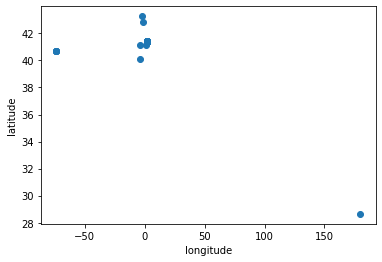

In [6]:
import matplotlib.pyplot as plt
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.scatter(y_val, x_val)
plt.ylabel('latitude')
plt.xlabel('longitude')

<AxesSubplot:>

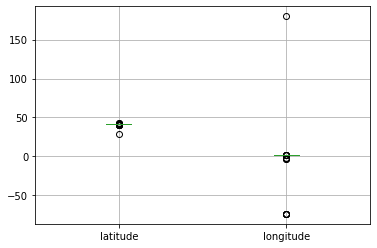

In [7]:
df.boxplot(return_type='axes')

In [8]:
Q1 = df['latitude'].quantile(0.25)
Q3 = df['latitude'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['latitude'] >= Q1 - 1.5 * IQR) & (df['latitude'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]

In [9]:
place_id_bcn = list(df.place_id.unique())

In [10]:
json_bcn = [x for x in json_data if x["place_id"] in place_id_bcn]

In [11]:
json_bcn[0]['reviews_data'][0]

{'user': {'name': 'OlekoBoom',
  'link': 'https://www.google.com/maps/contrib/102348760718259857950?hl=en-US&sa=X&ved=2ahUKEwj55L_A5P7zAhXL3J4KHX3cA9oQvvQBegQIARAu',
  'thumbnail': 'https://lh3.googleusercontent.com/a-/AOh14GhJG6v4xjoxSLpfQkMpWigWQe-fVrWDLVpk4PFw6Q=s40-c-c0x00000000-cc-rp-mo-ba4-br100',
  'local_guide': True,
  'reviews': 140,
  'photos': 136},
 'rating': 5.0,
 'date': '3 months ago',
 'snippet': "This is a great vegan kebab. For a pretty cheap price you get to compose your own falafel, and trust me, at the end you'll be full. Vegetables are fresh and tasty. Fries are crispy and also very tasty. Sauces also - top flavor. I can't complain on a single thing. Total recommendation :)",
 'likes': 2,
 'images': ['https://lh5.googleusercontent.com/p/AF1QipNVFndHUdKLRXG7yZncjnl02M8XSe2FIc0arOdf=w100-h100-p-n-k-no',
  'https://lh5.googleusercontent.com/p/AF1QipOBPxTqzCZclXpwadW_Q3hG0q2cIlE8aDo738Lh=w100-h100-p-n-k-no',
  'https://lh5.googleusercontent.com/p/AF1QipOjDLlfdXMsaqtI

## Remove backslash from username

In [12]:
for i in range(len(json_bcn)):
    for j in range(len(json_bcn[i]["reviews_data"])):
        json_bcn[i]['reviews_data'][j]["user"]["name"] = json_bcn[i]['reviews_data'][j]["user"]["name"].replace("/", "")

## Price to int

In [13]:
for i in range(len(json_bcn)):
    try:
        json_bcn[i]["price"] = min(4, len(json_bcn[i]["price"]))
    except:
        json_bcn[i]["price"] = 2

In [14]:
#sentiment_analysis('I hate you')[0]

## Modifiying missing ratings with sentiment analysis

In [15]:
from tqdm import tqdm

sentiment_analysis = pipeline("sentiment-analysis") # This might take a while
for i in tqdm(range(len(json_bcn))):
    # If the user does not have a rating we create it based on the sentimen analysis of the snippet
    for j in range(len(json_bcn[i]['reviews_data'])):
        try:
            rating = json_bcn[i]['reviews_data'][j]['rating']
        except:
            translator = Translator(to_lang="en")
            translation = translator.translate(json_bcn[i]['reviews_data'][j]['snippet'])
            try:
                sa = sentiment_analysis(translation)[0]
            except:
                translation = translation[:1500]
                sa = sentiment_analysis(translation)[0]

            if sa['label'] == 'POSITIVE':
                json_bcn[i]['reviews_data'][j]['rating'] = sa['score'] * 5
            else:
                json_bcn[i]['reviews_data'][j]['rating'] = 5 - sa['score'] * 5

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
100%|██████████| 239/239 [00:28<00:00,  8.49it/s]


Remove restaurants with no reviews

In [24]:
clean_json = []
for i,restaurant in enumerate(json_bcn):
    if len(restaurant['reviews_data']):
        clean_json.append(restaurant)
    else:
        print(i)

151
153
223


In [25]:
dict_names = {}
dict_place_id = {}
for restaurant in clean_json:
    if restaurant['title'] not in dict_names:
        dict_names[restaurant['title']] = 1
    else:
        dict_names[restaurant['title']] += 1
    
    if restaurant['place_id'] not in dict_place_id:
        dict_place_id[restaurant['place_id']] = 1
    else:
        dict_place_id[restaurant['place_id']] += 1
            
{k: v for k, v in sorted(dict_place_id.items(), key=lambda item: -item[1])}

{'ChIJefD4APiipBIRgyI_ff4Qhxc': 1,
 'ChIJteBarX6ipBIRRYygisKbcPs': 1,
 'ChIJxXT2zueipBIRhT17oqbcnx8': 1,
 'ChIJxZljK8mjpBIRAUQgty4vUL0': 1,
 'ChIJhRmZ7f2ipBIRs5_ZKx_mJV0': 1,
 'ChIJa-LjmfaipBIRfUaQ8IviPnI': 1,
 'ChIJQ8ly2viipBIRZANMAFMePb8': 1,
 'ChIJp4MZsfiipBIRM7YJu0xCScQ': 1,
 'ChIJbUeDbIyipBIRhf2n9OIXpig': 1,
 'ChIJo9a8zYWipBIRbExm8o2jDd8': 1,
 'ChIJ5UPwoWeipBIRaLUTymgdU2s': 1,
 'ChIJ4c9Z4mGipBIREUosG7_sVXg': 1,
 'ChIJ08vR2JOipBIRtSoV82KdIjA': 1,
 'ChIJyzttxfeipBIRGkElR5G73mQ': 1,
 'ChIJL2iZhoqipBIR8yrz7bAzwqg': 1,
 'ChIJvfD7cXuipBIRc-6k05FxgWI': 1,
 'ChIJd-kDghajpBIR526jrtyGZZA': 1,
 'ChIJ6zCmfe2ipBIRgNs_xHC75Ec': 1,
 'ChIJxUNniGWYpBIRRLODLxXKAhI': 1,
 'ChIJ90QMabGipBIRo2cb3n68X_A': 1,
 'ChIJDcIkmQ-YpBIRoLbpQjXxAiI': 1,
 'ChIJOWysT6-ipBIRB-PBz2M_lQQ': 1,
 'ChIJ6_dLhqujpBIRMs68zrFMqSc': 1,
 'ChIJw8oShmyjpBIRTIkEztxmO2Y': 1,
 'ChIJnxRQBKyjpBIRKFeCru2-P4I': 1,
 'ChIJ2xlMdCKjpBIR33Co6YN0V4I': 1,
 'ChIJjZxWjQ-YpBIR_xbBOD9lZ1k': 1,
 'ChIJ-_dtdeuipBIRJosW1OKbZl4': 1,
 'ChIJJWY_JHCYpBIRIR

## Save the data

In [26]:
f_data = open("Data/data.json", "w")
json.dump(clean_json, f_data)
f_data.close()

## Plot the restaurants on a map

In [19]:
BBox = (df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max())
BBox

(2.0869101, 2.2183364, 41.356697, 41.42046)

In [20]:
map = StaticMap(750, 750)
for idx, row in df.iterrows():
    marker = CircleMarker([row["longitude"], row["latitude"]], 'red', 4)
    marker_outline = CircleMarker([row["longitude"], row["latitude"]], 'black', 8)
    map.add_marker(marker_outline)
    map.add_marker(marker)
image = map.render()
image.save("restaurant_map.png")

NameError: name 'StaticMap' is not defined

In [ ]:
image